# Data Visualization Task
#### 3/1/23

Maho wants to make a plot with the same format as the one below:

<img src="exp_eng_int.png" width="500" height="300">

The x-axis represents the island condition, the y-axis represents the mean z-score, and the legend indicates the that-trace condition. The points also include error bars.

For now, my strategy is:
1. Get the mean z-score and SE for each of the 4 conditions
2. Manually extract the lists for plotting
3. Make a plt.errorbar plot with the same format

There's probably a faster or more automatic way to do this using multi-indexing, so I'll look into that later.

## Step 1. Mean z-scores and stdevs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

In [3]:
df = pd.read_csv("judgment_data_clean.csv")

# Only include the critical trials
df = df[df["trial_type"] == "experiment-critical"]

# Also, remove subj 17 and 22 since I never took them out of the clean dataset.
df = df.dropna()

df.head()

,subj_id,list,item,trial_type,condition,sentence,judgment,zscore
3,1,1,11,experiment-critical,nested_island,I talked about the man that I like the truck t...,3,-0.476923
6,1,1,8,experiment-critical,nested_no-island,I looked up the hospital that I believe I sent...,5,0.570437
10,1,1,6,experiment-critical,nested_no-island,I wrote about the farmer that I believe I rece...,6,1.094118
14,1,1,16,experiment-critical,crossed_no-island,I heard the politician that I believe I helped...,3,-0.476923
17,1,1,13,experiment-critical,crossed_no-island,I looked for the purse that I believe I receiv...,2,-1.000603


In [4]:
# Get the mean z-score and SE for each condition
means = df.groupby("condition")["zscore"].mean()
errors = df.groupby("condition")["zscore"].std()/(sqrt(len(df)))
means

condition
crossed_island      -0.546336
crossed_no-island    0.239661
nested_island       -0.542939
nested_no-island     0.400705
Name: zscore, dtype: float64

In [5]:
errors

condition
crossed_island       0.025503
crossed_no-island    0.033138
nested_island        0.025119
nested_no-island     0.031054
Name: zscore, dtype: float64

## Step 2. Extract lists for plotting

In order to make an errorbar plot, I'll need to get the x-labels, the means for crossed/nested, and the stdevs for crossed/nested

In [6]:
x_labels = ["non-island", "island"]

crossed_means = [means["crossed_no-island"], means["crossed_island"]]
nested_means = [means["nested_no-island"], means["nested_island"]]

crossed_errors = [errors["crossed_no-island"], errors["crossed_island"]]
nested_errors = [errors["nested_no-island"], errors["nested_island"]]

## Step 3. Make plot

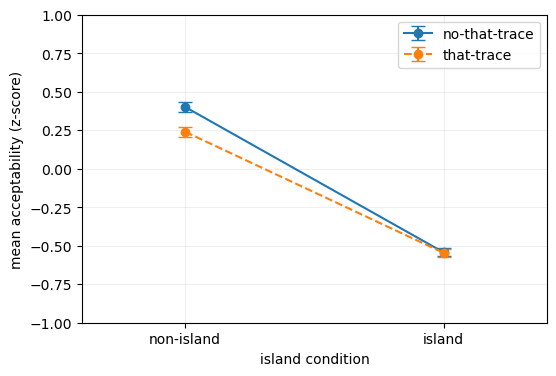

In [7]:
fig = plt.figure(figsize=(6, 4))

plt.errorbar(x=x_labels, y=nested_means, yerr=nested_errors, label="no-that-trace", 
             marker="o", capsize=5)
plt.errorbar(x=x_labels, y=crossed_means, yerr=crossed_errors, label="that-trace",  ls="--",
             marker="o", capsize=5)

plt.xlabel("island condition")
plt.ylabel("mean acceptability (z-score)")

plt.xlim(-.4, 1.4)
plt.ylim(-1, 1)

plt.grid(alpha=0.2)
plt.legend()
plt.show()